In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer


In [2]:
cancer = load_breast_cancer()
print(cancer.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
print(df.head())
print(df.shape)

print(df['target'].value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

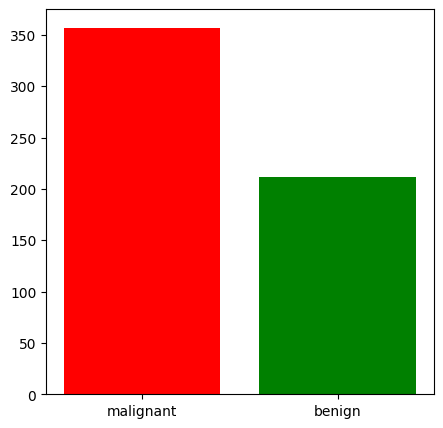

In [4]:
x = [cancer['target_names'][0], cancer['target_names'][1]]

y = [df['target'].value_counts()[1], df['target'].value_counts()[0]]

plt.figure(figsize=(5, 5))
plt.bar(x, y, color=['red', 'green'])
plt.show()


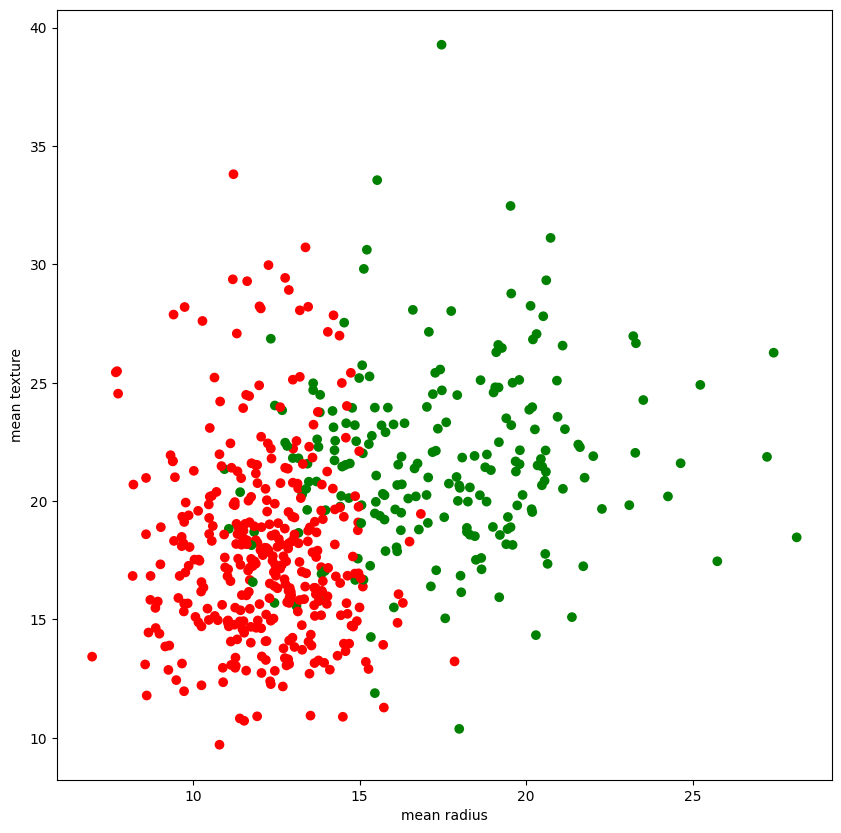

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(df['mean radius'], df['mean texture'], color=df['target'].map({1: 'red', 0: 'green'}))
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

In [6]:
x = df[df.columns[:-1]]
y = df['target']
print (x.shape, y.shape)

(569, 30) (569,)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=123 , stratify=y)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(455, 30) (455,)
(114, 30) (114,)


In [8]:
y_train.value_counts()
y_test.value_counts()

target
1.0    72
0.0    42
Name: count, dtype: int64

In [10]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.9824561403508771
